# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# A

In [2]:
df = pd.read_csv('./data/cats.csv')
df

,rownames,Gender,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3
...,...,...,...,...
139,140,M,3.7,11.0
140,141,M,3.8,14.8
141,142,M,3.8,16.8
142,143,M,3.9,14.4


In [3]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [4]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1}) # 0 for female and 1 for male

In [5]:
df

,rownames,Gender,Bwt,Hwt
0,1,0,2.0,7.0
1,2,0,2.0,7.4
2,3,0,2.0,9.5
3,4,0,2.1,7.2
4,5,0,2.1,7.3
...,...,...,...,...
139,140,1,3.7,11.0
140,141,1,3.8,14.8
141,142,1,3.8,16.8
142,143,1,3.9,14.4


In [6]:
X_train, X_test, Y_train, Y_test  = train_test_split(df[['Bwt','Hwt']],df['Gender'], test_size=0.2)

In [7]:
X_train

,Bwt,Hwt
110,3.1,12.1
84,2.7,11.1
140,3.8,14.8
97,2.9,11.3
117,3.2,13.0
...,...,...
64,2.5,7.9
80,2.7,9.6
49,2.1,10.1
77,2.6,11.5


# B

In [8]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [9]:
X_train_std = pd.DataFrame(X_train_std, columns=['Bwt','Hwt'])
X_test_std = pd.DataFrame(X_test_std, columns=['Bwt','Hwt'])

In [10]:
X_train_std

,Bwt,Hwt
0,0.822545,0.569848
1,-0.003592,0.175549
2,2.268283,1.634455
3,0.409476,0.254409
4,1.029079,0.924717
...,...,...
110,-0.416660,-1.086208
111,-0.003592,-0.415900
112,-1.242797,-0.218750
113,-0.210126,0.333268


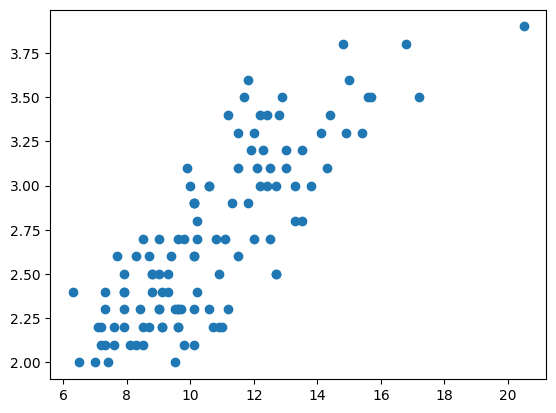

In [11]:
plt.scatter(X_train['Hwt'], X_train['Bwt'])
plt.show()

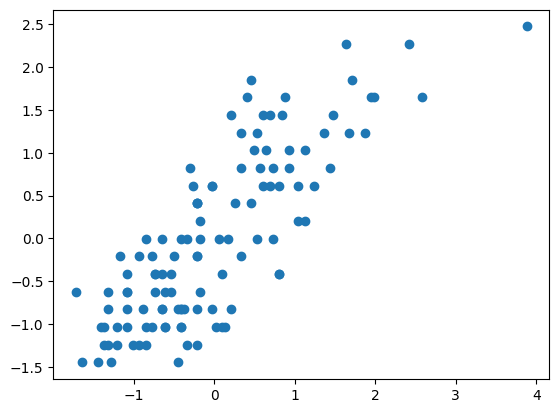

In [12]:
plt.scatter(X_train_std['Hwt'], X_train_std['Bwt'])
plt.show()

As you can see in these above images, when we normalize the data, our bias and scale of different variables are almost the same, which makes it easier to deal with. We are working with variables with almost the same bias and scale.

# C

In [13]:
Gamma = np.logspace(-6,1,16)
C_values = np.logspace(-2,5,8)

In [14]:
Classifier = SVC(kernel='linear') # Create a SVC object with linear kernel
parameters = {
    'C':C_values,
    'gamma':Gamma
} # Create a dictionary with parameters names (keys) and values
Grid = GridSearchCV(Classifier, parameters) # Create a GridSearchCV object for SVC with parameters
Grid.fit(X_train_std, Y_train) # Fit the GridSearchCV object on the training data

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'gamma': array([1.00000000e-06, 2.92864456e-06, 8.57695899e-06, 2.51188643e-05,
       7.35642254e-05, 2.15443469e-04, 6.30957344e-04, 1.84784980e-03,
       5.41169527e-03, 1.58489319e-02, 4.64158883e-02, 1.35935639e-01,
       3.98107171e-01, 1.16591440e+00, 3.41454887e+00, 1.00000000e+01])})

In [15]:
Grid.best_params_ # Get the best parameters

{'C': 1.0, 'gamma': 1e-06}

# D

In [16]:
Grid.best_score_ # Get the best score

0.7565217391304346

In [17]:
Classifier = SVC(kernel='rbf') # Create a SVC object with RBF kernel
parameters = {
    'C':C_values,
    'gamma':Gamma
} # Create a dictionary with parameters names (keys) and values
Grid = GridSearchCV(Classifier, parameters) # Create a GridSearchCV object for SVC with parameters
Grid.fit(X_train_std, Y_train) # Fit the GridSearchCV object on the training data

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'gamma': array([1.00000000e-06, 2.92864456e-06, 8.57695899e-06, 2.51188643e-05,
       7.35642254e-05, 2.15443469e-04, 6.30957344e-04, 1.84784980e-03,
       5.41169527e-03, 1.58489319e-02, 4.64158883e-02, 1.35935639e-01,
       3.98107171e-01, 1.16591440e+00, 3.41454887e+00, 1.00000000e+01])})

In [18]:
Grid.best_params_

{'C': 1.0, 'gamma': 1.165914401179831}

In [19]:
Grid.best_score_

0.773913043478261

As you can see, our accuracies are almost the same. But the RBF kernel works a little better than the linear kernel. The reason is that RBF can capture non-linear patterns and works a little bit better in this dataset. Also, linear works really well on high-dimensional datasets, but in this example, we do not involve a high-dimensional dataset. Also, our dataset is small, so we cannot generalize on these data with these accuracies because two samples may change the accuracy and make RBF the better kernel.

# E

In [20]:
best_model = Grid.best_estimator_ # Get the best model

In [21]:
best_model

SVC(gamma=1.165914401179831)

In [23]:
y_predicton = best_model.predict(X_test_std) # Predict on the test set
accuracy = accuracy_score(Y_test, y_predicton) # Get the accuracy
print(f'Accuray on test set is {100*accuracy}')

Accuray on test set is 79.3103448275862
